In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv files for general information and prices
data_info = pd.read_csv('Data/gpu_info.csv')
data_prices = pd.read_csv('Data/gpu_prices.csv')
data_rx = pd.read_csv('Data/gpu_info_rx.csv')
data_rx_less = pd.read_csv('Data/gpu_info_rx_550less.csv')
data_nvidia = pd.read_csv('Data/gpu_info_nvidia.csv')
data_arc = pd.read_csv('Data/gpu_info_arc.csv')

In [3]:
# listing all products from all sources
manufacturer = data_info['manufacturer'].tolist()
product = data_info['productName'].tolist()
vram = data_info['memSize'].tolist()
memory_bus = data_info['memBusWidth'].tolist()
gpu_clock = data_info['gpuClock'].tolist()
mem_clock = data_info['memClock'].tolist()
release_year = data_info['releaseYear'].tolist()

# listing products for every manufacturer
    # intel
manufacturer_arc = data_arc['manufacturer'].tolist()
product_arc = data_arc['productName'].tolist()
vram_arc = data_arc['memSize'].tolist()
memory_bus_arc = data_arc['memBusWidth'].tolist()
gpu_clock_arc = data_arc['gpuClock'].tolist()
mem_clock_arc = data_arc['memClock'].tolist()
release_year_arc = data_arc['releaseYear'].tolist()

    # nvidia
manufacturer_nvidia = data_nvidia['manufacturer'].tolist()
product_nvidia = data_nvidia['productName'].tolist()
vram_nvidia = data_nvidia['memSize'].tolist()
memory_bus_nvidia = data_nvidia['memBusWidth'].tolist()
gpu_clock_nvidia = data_nvidia['gpuClock'].tolist()
mem_clock_nvidia = data_nvidia['memClock'].tolist()
release_year_nvidia = data_nvidia['releaseYear'].tolist()

    # AMD with ray tracing
manufacturer_rx = data_rx['manufacturer'].tolist()
product_rx = data_rx['productName'].tolist()
vram_rx = data_rx['memSize'].tolist()
memory_bus_rx = data_rx['memBusWidth'].tolist()
gpu_clock_rx = data_rx['gpuClock'].tolist()
mem_clock_rx = data_rx['memClock'].tolist()
release_year_rx = data_rx['releaseYear'].tolist()

    # AMD without ray tracing
manufacturer_less = data_rx_less['manufacturer'].tolist()
product_less = data_rx_less['productName'].tolist()
vram_less = data_rx_less['memSize'].tolist()
memory_bus_less = data_rx_less['memBusWidth'].tolist()
gpu_clock_less = data_rx_less['gpuClock'].tolist()
mem_clock_less = data_rx_less['memClock'].tolist()
release_year_less = data_rx_less['releaseYear'].tolist()

In [4]:
# creating a dataframe for all information
df1 = pd.DataFrame({
    'Manufacturer' : manufacturer,
    'Product' : product,
    'VRAM' : vram,
    'Memory Bus Width' : memory_bus,
    'GPU Clock' : gpu_clock,
    'Memory Clock' : mem_clock,
    'Release Year' : release_year
})

# dataframes for indivual manufacturers
    # nvidia
df_nvidia = pd.DataFrame({
    'Manufacturer' : manufacturer_nvidia,
    'Product' : product_nvidia,
    'VRAM' : vram_nvidia,
    'Memory Bus Width' : memory_bus_nvidia,
    'GPU Clock' : gpu_clock_nvidia,
    'Memory Clock' : mem_clock_nvidia,
    'Release Year' : release_year_nvidia
})

    # arc
df_arc = pd.DataFrame({
    'Manufacturer' : manufacturer_arc,
    'Product' : product_arc,
    'VRAM' : vram_arc,
    'Memory Bus Width' : memory_bus_arc,
    'GPU Clock' : gpu_clock_arc,
    'Memory Clock' : mem_clock_arc,
    'Release Year' : release_year_arc
})

    # amd with ray tracing
df_rx = pd.DataFrame({
    'Manufacturer' : manufacturer_rx,
    'Product' : product_rx,
    'VRAM' : vram_rx,
    'Memory Bus Width' : memory_bus_rx,
    'GPU Clock' : gpu_clock_rx,
    'Memory Clock' : mem_clock_rx,
    'Release Year' : release_year_rx
})

    # amd without ray tracing
df_less = pd.DataFrame({
    'Manufacturer' : manufacturer_less,
    'Product' : product_less,
    'VRAM' : vram_less,
    'Memory Bus Width' : memory_bus_less,
    'GPU Clock' : gpu_clock_less,
    'Memory Clock' : mem_clock_less,
    'Release Year' : release_year_less
})

In [5]:
# Highest vram
vram = data_info.loc[data_info['memSize'].idxmax()]
print('GPU with the highest VRAM:\n')
print(vram)

# Highest Memory Bus
mem_bus = data_info.loc[data_info['memBusWidth'].idxmax()]
print('\nGPU the highest Memory Bus:\n')
print(mem_bus)

GPU with the highest VRAM:

manufacturer                  NVIDIA
productName      GeForce RTX 3090 Ti
releaseYear                     2022
memSize                           24
memBusWidth                      384
gpuClock                        1560
memClock                        1313
unifiedShader                  10752
tmu                              336
rop                              112
pixelShader                      NaN
vertexShader                     NaN
igp                               No
bus                     PCIe 4.0 x16
memType                       GDDR6X
gpuChip                        GA102
Name: 20, dtype: object

GPU the highest Memory Bus:

manufacturer               NVIDIA
productName      GeForce RTX 3080
releaseYear                  2022
memSize                        12
memBusWidth                   384
gpuClock                     1260
memClock                     1188
unifiedShader                8960
tmu                           280
rop                 

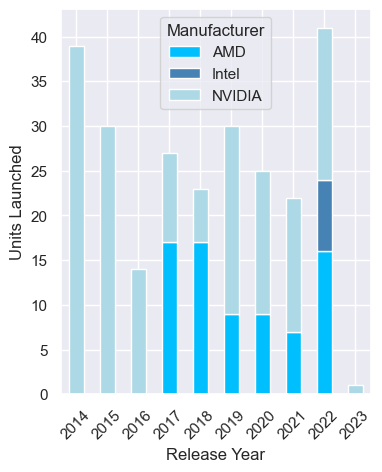

In [54]:
# Number of GPUs released per year
facet = (pd.crosstab(df1['Release Year'],
                    [df1['Manufacturer']],)
         .iloc[:])

#colors
colors = ['deepskyblue', 'steelblue', 'lightblue']

sns.set(rc={'figure.figsize':(4,5)})
facet.plot(kind = 'bar', stacked = True, color = colors)
plt.ylabel('Units Launched')
plt.xticks(rotation = 45)
plt.savefig('Graphs/GPUS_over_year.png', bbox_inches="tight")
plt.show()

In [22]:
rtx4000 = df_nvidia[df_nvidia['Product'].str.contains('RTX 40')]
rtx3000 = df_nvidia[df_nvidia['Product'].str.contains('RTX 30')]
rtx2000 = df_nvidia[df_nvidia['Product'].str.contains('RTX 20')]
gtx1000 = df_nvidia[df_nvidia['Product'].str.contains('GTX 10')]
gtx900 = df_nvidia[df_nvidia['Product'].str.contains('GTX 9')]
titan = df_nvidia[df_nvidia['Product'].str.contains('TITAN')]
gf800 = df_nvidia[df_nvidia['Product'].str.contains('GeForce 8')]
gf700 = df_nvidia[df_nvidia['Product'].str.contains('GeForce 7')]
gt700 = df_nvidia[df_nvidia['Product'].str.contains('GT 7')]
gt600 = df_nvidia[df_nvidia['Product'].str.contains('GT 6')]
rx7000 = df_rx[df_rx['Product'].str.contains('RX 7')]
rx6000 = df_rx[df_rx['Product'].str.contains('RX 6')]
rx5000 = df_rx[df_rx['Product'].str.contains('RX 5')]
r600 = df_less[df_less['Product'].str.contains('Radeon 6')]
r500 = df_less[df_less['Product'].str.contains('Radeon 5')]
rx500 = df_less[df_less['Product'].str.contains('Radeon RX 5')]
arc_intel = df_arc[df_arc['Product'].str.contains('Arc')]

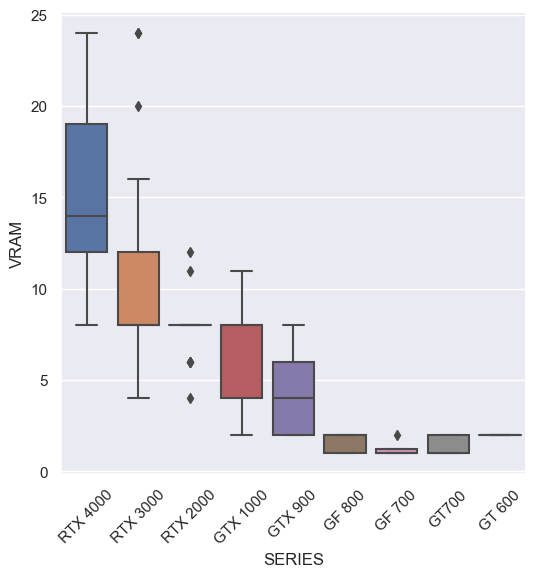

In [50]:
# Boxplot for Nvidia GPUs
# choosing the variable for the graph (VRAM)
n1 = rtx4000.iloc[:, [2]]
n2 = rtx3000.iloc[:, [2]]
n3 = rtx2000.iloc[:, [2]]
n4 = gtx1000.iloc[:, [2]]
n5 = gtx900.iloc[:, [2]]
n6 = gf800.iloc[:, [2]]
n7 = gf700.iloc[:, [2]]
n8 = gt700.iloc[:, [2]]
n9 = gt600.iloc[:, [2]]

# labels
labels1 = ['RTX 4000', 'RTX 3000', 'RTX 2000', 'GTX 1000', 'GTX 900', 'GF 800', 'GF 700', 'GT700', 'GT 600']

# graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = (n1, n2, n3, n4, n5, n6, n7, n8, n9))
ax.set_xticklabels(labels1)
plt.xticks(rotation = 45)
plt.xlabel('SERIES')
plt.ylabel('VRAM')
plt.savefig('Graphs/nvidia_vram.png', bbox_inches="tight")
plt.show()

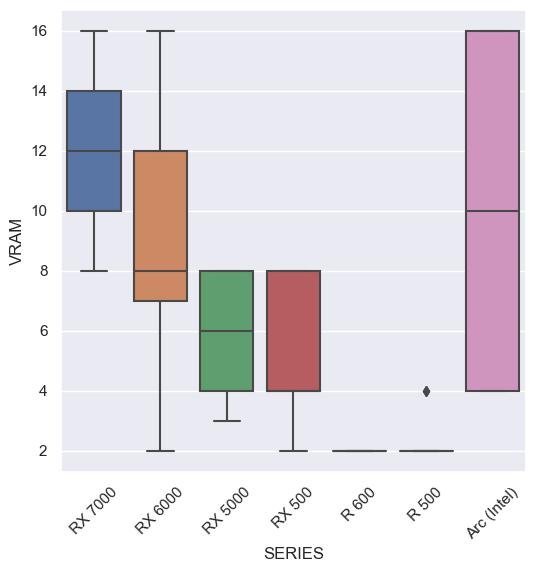

In [49]:
# boxplot for AMD GPUs and Intel
# choosing the variable for the graph (VRAM)
r1 = rx7000.iloc[:, [2]]
r2 = rx6000.iloc[:, [2]]
r3 = rx5000.iloc[:, [2]]
r4 = rx500.iloc[:, [2]]
r5 = r600.iloc[:, [2]]
r6 = r500.iloc[:, [2]]
r7 = arc_intel.iloc[:, [2]]

# labels
labels2 = ['RX 7000', 'RX 6000', 'RX 5000', 'RX 500', 'R 600', 'R 500', 'Arc (Intel)']

# graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = (r1, r2, r3, r4, r5, r6, r7))
ax.set_xticklabels(labels2)
plt.xticks(rotation = 45)
plt.xlabel('SERIES')
plt.ylabel('VRAM')
plt.savefig('Graphs/amd_intel_vram.png', bbox_inches="tight")
plt.show()

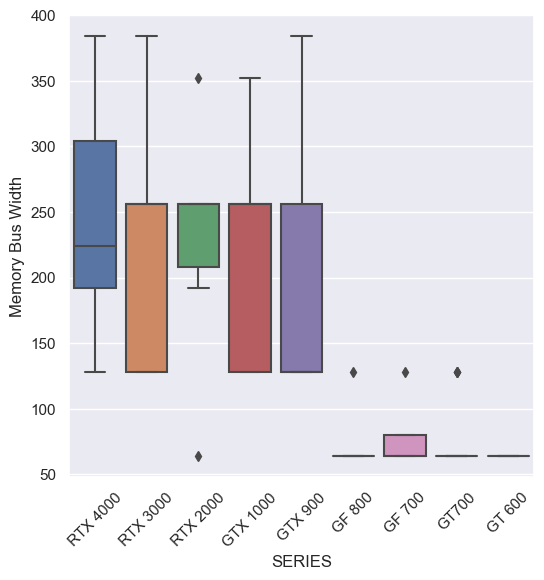

In [48]:
# Boxplot for Nvidia GPUs
# choosing the variable for the graph ('Memory bus)
n1 = rtx4000.iloc[:, [3]]
n2 = rtx3000.iloc[:, [3]]
n3 = rtx2000.iloc[:, [3]]
n4 = gtx1000.iloc[:, [3]]
n5 = gtx900.iloc[:, [3]]
n6 = gf800.iloc[:, [3]]
n7 = gf700.iloc[:, [3]]
n8 = gt700.iloc[:, [3]]
n9 = gt600.iloc[:, [3]]

# labels
labels1 = ['RTX 4000', 'RTX 3000', 'RTX 2000', 'GTX 1000', 'GTX 900', 'GF 800', 'GF 700', 'GT700', 'GT 600']

# graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = (n1, n2, n3, n4, n5, n6, n7, n8, n9))
ax.set_xticklabels(labels1)
plt.xticks(rotation = 45)
plt.xlabel('SERIES')
plt.ylabel('Memory Bus Width')
plt.savefig('Graphs/nvidia_bus.png', bbox_inches="tight")
plt.show()

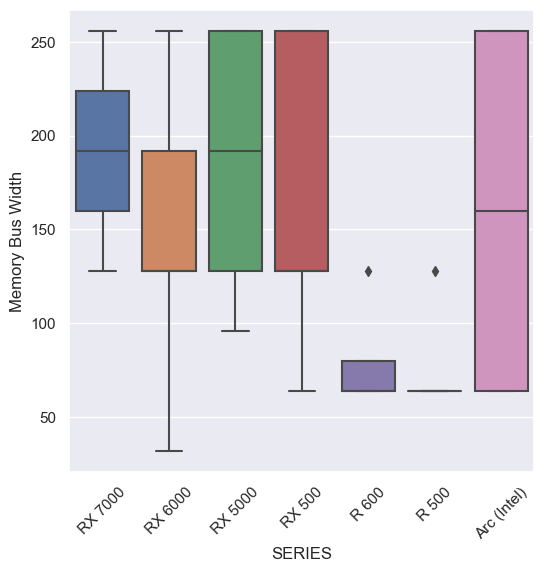

In [47]:
# boxplot for AMD GPUs and Intel
# choosing the variable for the graph (Memory Bus)
r1 = rx7000.iloc[:, [3]]
r2 = rx6000.iloc[:, [3]]
r3 = rx5000.iloc[:, [3]]
r4 = rx500.iloc[:, [3]]
r5 = r600.iloc[:, [3]]
r6 = r500.iloc[:, [3]]
r7 = arc_intel.iloc[:, [3]]

# labels
labels2 = ['RX 7000', 'RX 6000', 'RX 5000', 'RX 500', 'R 600', 'R 500', 'Arc (Intel)']

# graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = (r1, r2, r3, r4, r5, r6, r7))
ax.set_xticklabels(labels2)
plt.xticks(rotation = 45)
plt.xlabel('SERIES')
plt.ylabel('Memory Bus Width')
plt.savefig('Graphs/amd_intel_bus.png', bbox_inches="tight")
plt.show()

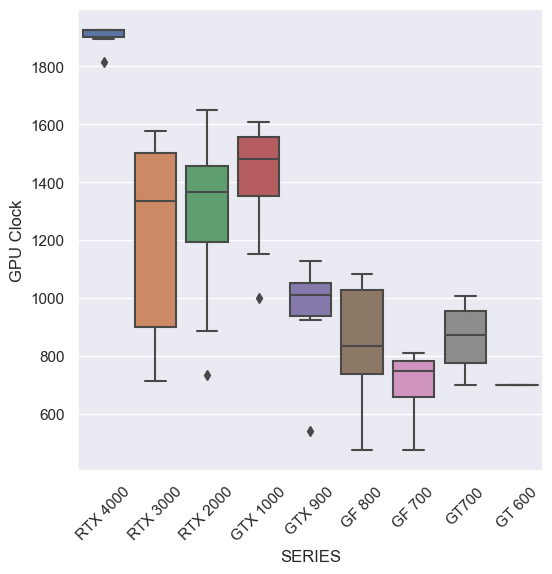

In [46]:
# Boxplot for Nvidia GPUs
# choosing the variable for the graph ('GPU Clock)
n1 = rtx4000.iloc[:, [4]]
n2 = rtx3000.iloc[:, [4]]
n3 = rtx2000.iloc[:, [4]]
n4 = gtx1000.iloc[:, [4]]
n5 = gtx900.iloc[:, [4]]
n6 = gf800.iloc[:, [4]]
n7 = gf700.iloc[:, [4]]
n8 = gt700.iloc[:, [4]]
n9 = gt600.iloc[:, [4]]

# labels
labels1 = ['RTX 4000', 'RTX 3000', 'RTX 2000', 'GTX 1000', 'GTX 900', 'GF 800', 'GF 700', 'GT700', 'GT 600']

# graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = (n1, n2, n3, n4, n5, n6, n7, n8, n9))
ax.set_xticklabels(labels1)
plt.xticks(rotation = 45)
plt.xlabel('SERIES')
plt.ylabel('GPU Clock')
plt.savefig('Graphs/nvidia_gpu_c.png', bbox_inches="tight")
plt.show()

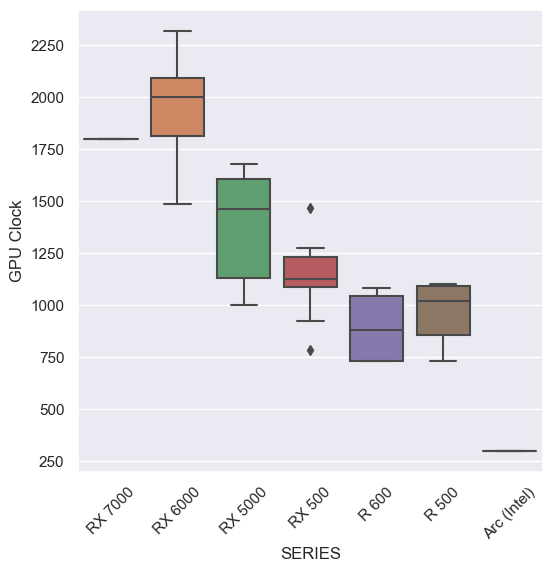

In [45]:
# boxplot for AMD GPUs and Intel
# choosing the variable for the graph (GPU Clock)
r1 = rx7000.iloc[:, [4]]
r2 = rx6000.iloc[:, [4]]
r3 = rx5000.iloc[:, [4]]
r4 = rx500.iloc[:, [4]]
r5 = r600.iloc[:, [4]]
r6 = r500.iloc[:, [4]]
r7 = arc_intel.iloc[:, [4]]

# labels
labels2 = ['RX 7000', 'RX 6000', 'RX 5000', 'RX 500', 'R 600', 'R 500', 'Arc (Intel)']

# graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = (r1, r2, r3, r4, r5, r6, r7))
ax.set_xticklabels(labels2)
plt.xticks(rotation = 45)
plt.xlabel('SERIES')
plt.ylabel('GPU Clock')
plt.savefig('Graphs/amd_intel_gpu_c.png', bbox_inches="tight")
plt.show()

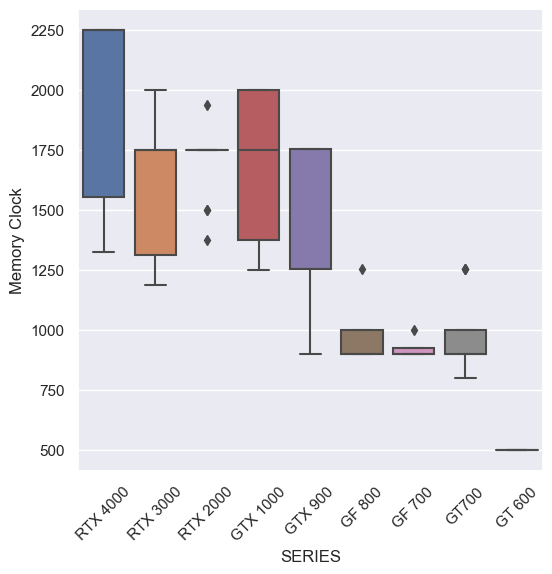

In [44]:
# Boxplot for Nvidia GPUs
# choosing the variable for the graph ('Memory Clock)
n1 = rtx4000.iloc[:, [5]]
n2 = rtx3000.iloc[:, [5]]
n3 = rtx2000.iloc[:, [5]]
n4 = gtx1000.iloc[:, [5]]
n5 = gtx900.iloc[:, [5]]
n6 = gf800.iloc[:, [5]]
n7 = gf700.iloc[:, [5]]
n8 = gt700.iloc[:, [5]]
n9 = gt600.iloc[:, [5]]

# labels
labels1 = ['RTX 4000', 'RTX 3000', 'RTX 2000', 'GTX 1000', 'GTX 900', 'GF 800', 'GF 700', 'GT700', 'GT 600']

# graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = (n1, n2, n3, n4, n5, n6, n7, n8, n9))
ax.set_xticklabels(labels1)
plt.xticks(rotation = 45)
plt.xlabel('SERIES')
plt.ylabel('Memory Clock')
plt.savefig('Graphs/nvidia_mem_c.png', bbox_inches="tight")
plt.show()

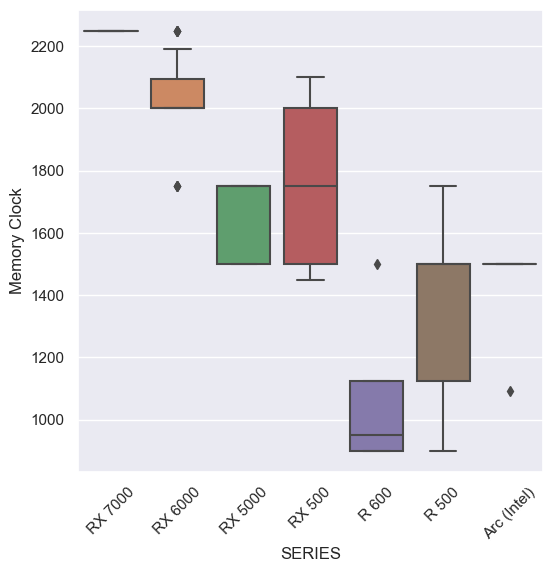

In [43]:
# boxplot for AMD and Intel GPUs
# choosing the variable for the graph (Memory Clock)
r1 = rx7000.iloc[:, [5]]
r2 = rx6000.iloc[:, [5]]
r3 = rx5000.iloc[:, [5]]
r4 = rx500.iloc[:, [5]]
r5 = r600.iloc[:, [5]]
r6 = r500.iloc[:, [5]]
r7 = arc_intel.iloc[:, [5]]

# labels
labels2 = ['RX 7000', 'RX 6000', 'RX 5000', 'RX 500', 'R 600', 'R 500', 'Arc (Intel)']

# graph
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(6,6)})
sns.boxplot(data = (r1, r2, r3, r4, r5, r6, r7))
ax.set_xticklabels(labels2)
plt.xticks(rotation = 45)
plt.xlabel('SERIES')
plt.ylabel('Memory Clock')
plt.savefig('Graphs/amd_intel_mem_c.png', bbox_inches="tight")
plt.show()